In [1]:
#Nyimas Adinda Paradiza_202331041
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Nyimas Adinda Paradiza_202331041
img = cv2.imread('Nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
#Nyimas Adinda Paradiza_202331041
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [5]:
#Nyimas Adinda Paradiza_202331041
mask_blue = cv2.inRange(hsv, np.array([100, 50, 50]), np.array([140, 255, 255]))
mask_red = cv2.inRange(hsv, np.array([0, 50, 50]), np.array([10, 255, 255])) + \
           cv2.inRange(hsv, np.array([160, 50, 50]), np.array([180, 255, 255]))
mask_green = cv2.inRange(hsv, np.array([40, 50, 50]), np.array([80, 255, 255]))

In [6]:
#Nyimas Adinda Paradiza_202331041
def highlight_color(mask, gray_img):
    result = gray_img.copy()
    result = cv2.normalize(result, None, None, 255, cv2.NORM_MINMAX)  
    result[mask != 0] = 245  
    return result

In [7]:
#Nyimas Adinda Paradiza_202331041
gray_blue = highlight_color(mask_blue, gray)
gray_red = highlight_color(mask_red, gray)
gray_green = highlight_color(mask_green, gray)

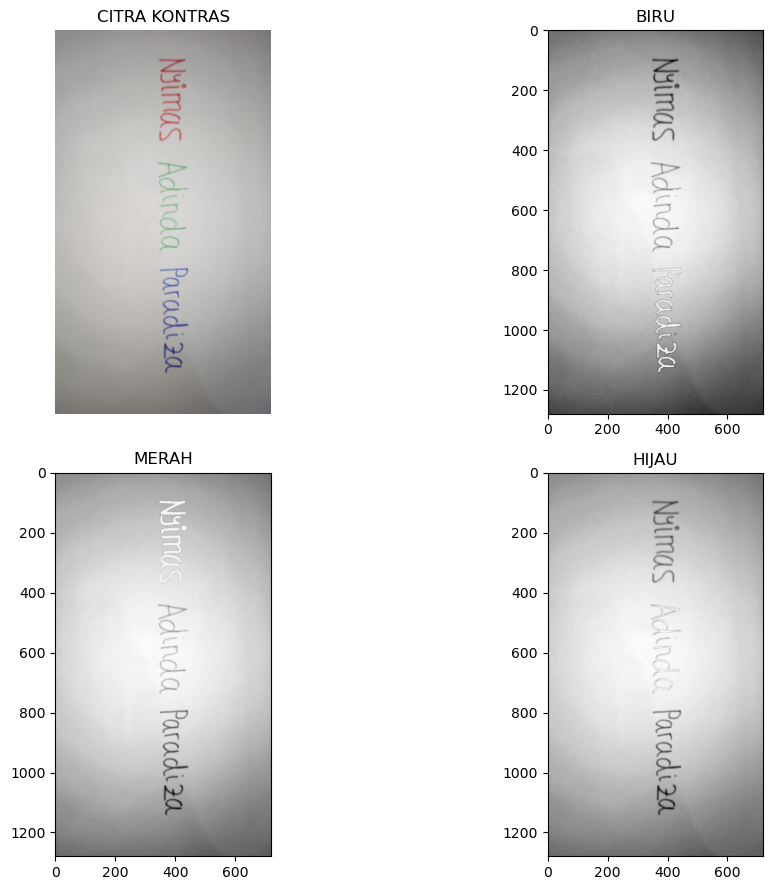

In [8]:
#Nyimas Adinda Paradiza_202331041
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("CITRA KONTRAS")
axs[0, 0].axis("off")

axs[0, 1].imshow(gray_blue, cmap='gray')
axs[0, 1].set_title("BIRU")
axs[0, 1].axis("on")

axs[1, 0].imshow(gray_red, cmap='gray')
axs[1, 0].set_title("MERAH")
axs[1, 0].axis("on")

axs[1, 1].imshow(gray_green, cmap='gray')
axs[1, 1].set_title("HIJAU")
axs[1, 1].axis("on")

plt.tight_layout()
plt.show()

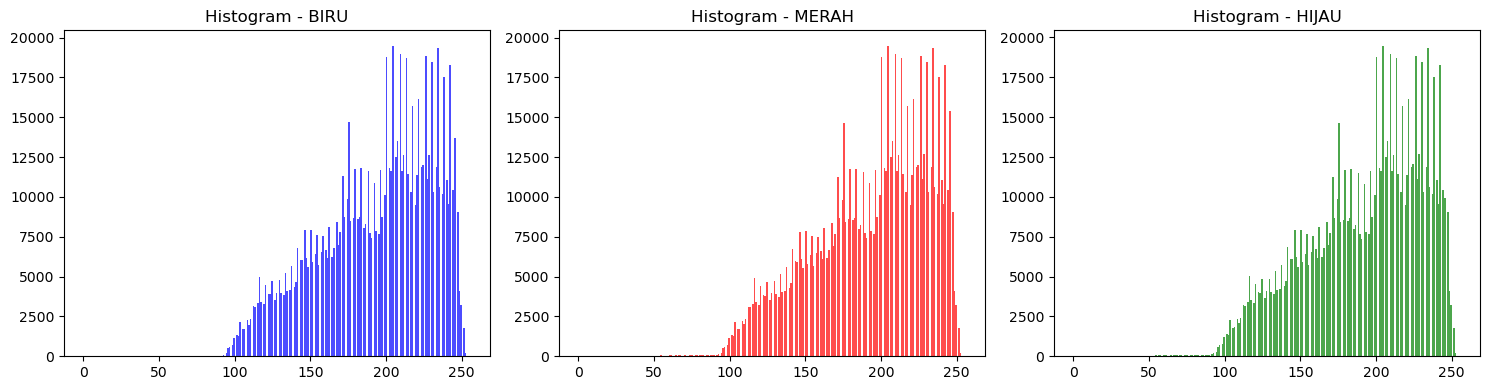

In [9]:
#Nyimas Adinda Paradiza_202331041
fig2, axs2 = plt.subplots(1, 3, figsize=(15, 4))

axs2[0].hist(gray_blue.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
axs2[0].set_title("Histogram - BIRU")

axs2[1].hist(gray_red.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
axs2[1].set_title("Histogram - MERAH")

axs2[2].hist(gray_green.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
axs2[2].set_title("Histogram - HIJAU")

plt.tight_layout()
plt.show()

In [10]:
#Nyimas Adinda Paradiza_202331041
def make_binary(mask):
    binary = np.zeros_like(mask)
    binary[mask > 0] = 255
    return binary

In [11]:
#Nyimas Adinda Paradiza_202331041
color_thresholds = [
    {"color": "Merah", "lower": [0, 50, 50], "upper": [10, 255, 255]},
    {"color": "Hijau", "lower": [40, 50, 50], "upper": [80, 255, 255]},
    {"color": "Biru", "lower": [100, 50, 50], "upper": [140, 255, 255]},
    {"color": "Merah", "lower": [160, 50, 50], "upper": [180, 255, 255]},
]

In [12]:
#Nyimas Adinda Paradiza_202331041
color_thresholds_sorted = sorted(color_thresholds, key=lambda x: x["lower"][0])

In [13]:
#Nyimas Adinda Paradiza_202331041
print("Daftar Ambang Batas HSV (diurutkan berdasarkan Hue):")
for i, item in enumerate(color_thresholds_sorted, 1):
    print(f"{i}. Warna: {item['color']}")
    print(f"   Lower HSV: {item['lower']}")
    print(f"   Upper HSV: {item['upper']}\n")

Daftar Ambang Batas HSV (diurutkan berdasarkan Hue):
1. Warna: Merah
   Lower HSV: [0, 50, 50]
   Upper HSV: [10, 255, 255]

2. Warna: Hijau
   Lower HSV: [40, 50, 50]
   Upper HSV: [80, 255, 255]

3. Warna: Biru
   Lower HSV: [100, 50, 50]
   Upper HSV: [140, 255, 255]

4. Warna: Merah
   Lower HSV: [160, 50, 50]
   Upper HSV: [180, 255, 255]



In [15]:
#Nyimas Adinda Paradiza_202331041
img = cv2.imread('Nama.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [16]:
#Nyimas Adinda Paradiza_202331041
mask_red = cv2.inRange(hsv, np.array([0, 50, 50]), np.array([10, 255, 255])) + \
           cv2.inRange(hsv, np.array([160, 50, 50]), np.array([180, 255, 255]))
mask_green = cv2.inRange(hsv, np.array([40, 50, 50]), np.array([80, 255, 255]))
mask_blue = cv2.inRange(hsv, np.array([100, 50, 50]), np.array([140, 255, 255]))

In [17]:
none = np.zeros_like(mask_blue)
only_blue = mask_blue
red_blue = cv2.bitwise_or(mask_red, mask_blue)
rgb = cv2.bitwise_or(red_blue, mask_green)
#Nyimas Adinda Paradiza_202331041

In [18]:
img_none = make_binary(none)
img_blue = make_binary(only_blue) #Nyimas Adinda Paradiza_202331041
img_rb = make_binary(red_blue)
img_rgb = make_binary(rgb)

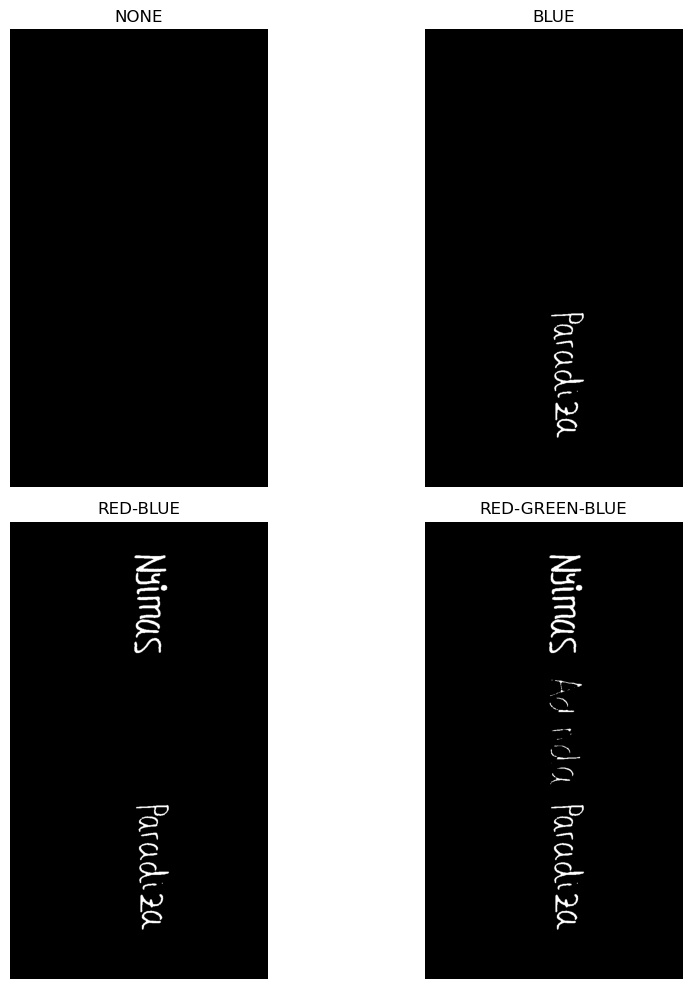

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img_none, cmap='gray')
axs[0, 0].set_title("NONE")
axs[0, 0].axis("off")

axs[0, 1].imshow(img_blue, cmap='gray')
axs[0, 1].set_title("BLUE")
axs[0, 1].axis("off")

axs[1, 0].imshow(img_rb, cmap='gray') #Nyimas Adinda Paradiza_202331041
axs[1, 0].set_title("RED-BLUE")
axs[1, 0].axis("off")

axs[1, 1].imshow(img_rgb, cmap='gray')
axs[1, 1].set_title("RED-GREEN-BLUE")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()